In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_trees_raw = pd.read_csv("../../data/raw/raw_trainset.csv")
df_trees = df_trees_raw.copy()
df_trees["time"] = pd.to_datetime(df_trees["time"])
spectral_bands = ["b2", "b3", "b4", "b5", "b6", "b7", "b8", "b8a", "b11", "b12"]


In [ ]:
df_smooth = (
    df_trees[spectral_bands]
    .rolling(window=3)
    .mean()
    .add_suffix('_smoothing')
)

df = pd.concat([df_trees, df_smooth], axis=1)

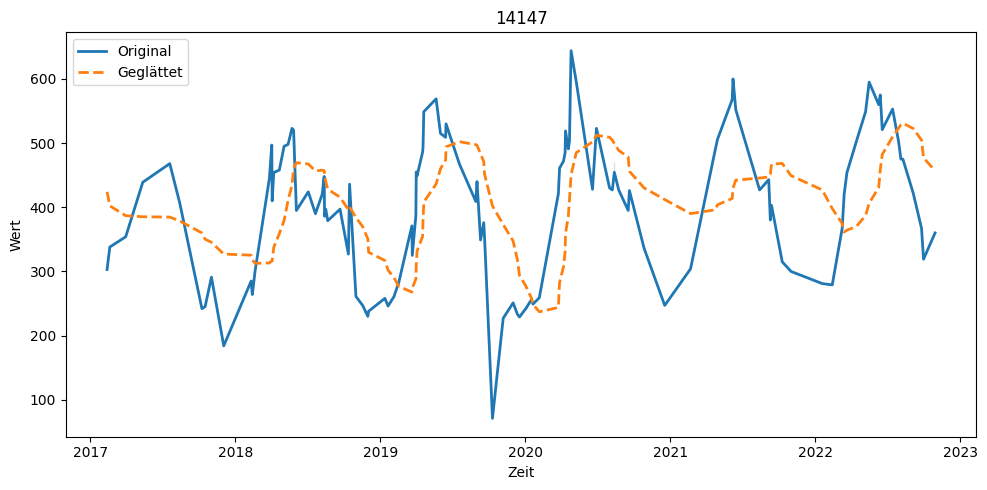

In [4]:
def compare_species_year(df, id):
    """
    Vergleicht Original- und Augmentierte Werte einer Species und eines Jahres für ein Band.
    """
    # Filter Originaldaten
    df = df[df["id"] == id].sort_values("time")



    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="time", y="b12", data=df, label="Original", linewidth=2)
    sns.lineplot(x="time", y="b12_glatt", data=df, label="Geglättet", linewidth=2, linestyle="--")

    plt.title(f"{id}")
    plt.xlabel("Zeit")
    plt.ylabel("Wert")
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_species_year(df, 14147)